In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df= pd.read_csv('C:/Users/Rigua/OneDrive/Documents/freecodecamp/proyectos/medical_examination.csv')

In [25]:
df.head()

id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  glu  smoke  \
0   0  18393    2     168    62.0    110     80            1    1      0   
1   1  20228    1     156    85.0    140     90            3    1      0   
2   2  18857    1     165    64.0    130     70            3    1      0   
3   3  17623    2     169    82.0    150    100            1    1      0   
4   4  17474    1     156    56.0    100     60            1    1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [6]:
#Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing
#their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. 
#Use the value 0 for NOT overweight and the value 1 for overweight.
df['overweight']= np.where((df['weight']/ (df['height'] ** 2) * 10000) > 25,1,0)

In [7]:
df.head()

age  sex  height  weight  ap_hi  ap_lo  cholesterol  glu  smoke  alco  \
id                                                                            
0   18393    2     168    62.0    110     80            1    1      0     0   
1   20228    1     156    85.0    140     90            3    1      0     0   
2   18857    1     165    64.0    130     70            3    1      0     0   
3   17623    2     169    82.0    150    100            1    1      0     0   
4   17474    1     156    56.0    100     60            1    1      0     0   

    active  cardio  overweight  
id                              
0        1       0           0  
1        1       1           1  
2        0       1           0  
3        1       1           1  
4        0       0           0

In [9]:
#Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, 
#make the value 0. If the value is more than 1, make the value 1.
df['cholesterol']=np.where(df['cholesterol'] ==1,0,1)
df['glu']=np.where(df['glu'] ==1,0,1)

In [49]:
# Draw Categorical Plot
#def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','glu','smoke','alco','active','overweight'])
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one 
#of the columns for the catplot to work correctly.
df_cat['total'] = 0
df_cat=df_cat.groupby(['cardio','variable','value'],as_index = False).count()
df_cat.head()

cardio     variable  value  total
0       0       active      0   6378
1       0       active      1  28643
2       0         alco      0  33080
3       0         alco      1   1941
4       0  cholesterol      0   5691

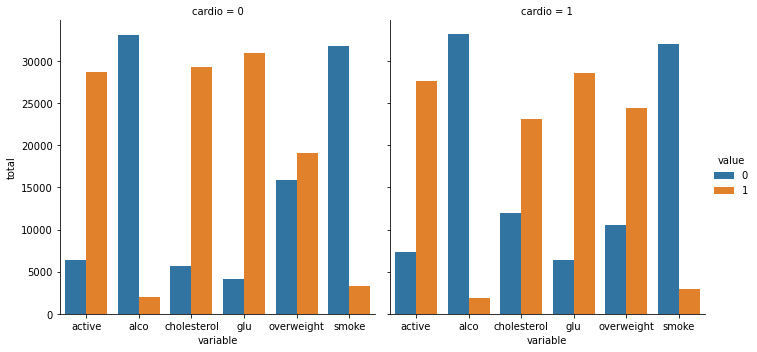

In [53]:
# Draw the catplot with 'sns.catplot()
fig = sns.catplot(x='variable',y='total',hue='value',kind='bar', data=df_cat,col='cardio')

In [10]:
#Clean the data. Filter out the following patient segments that represent incorrect data:

    #diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    #height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    #height is more than the 97.5th percentile
    #weight is less than the 2.5th percentile
    #weight is more than the 97.5th percentile

df_heat = df[
          (df['ap_lo']<= df['ap_hi'])&
          (df['height'] >= df['height'].quantile(0.025))&
          (df['height'] <= df['height'].quantile(0.975))&
          (df['weight'] >= df['weight'].quantile(0.025))&
          (df['weight'] >= df['weight'].quantile(0.975))]

In [12]:
df_heat.head()

age  sex  height  weight  ap_hi  ap_lo  cholesterol  glu  smoke  alco  \
id                                                                             
24   16782    2     172   112.0    120     80            1    1      0     0   
114  19570    1     152   110.0    160     90            1    1      0     0   
267  22675    1     176   108.0    140     90            1    1      0     0   
366  17460    1     165   115.0    150    100            1    1      0     0   
390  22510    2     170   115.0    120     80            2    2      0     0   

     active  cardio  
id                   
24        0       1  
114       1       1  
267       0       0  
366       1       1  
390       1       0

In [18]:
# Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). 
#Mask the upper triangle. The chart should look like examples/Figure_2.png.
corr = df_heat.corr(method='pearson')
# Generate a mask for the upper triangle
mask = np.triu(corr)


<AxesSubplot:>

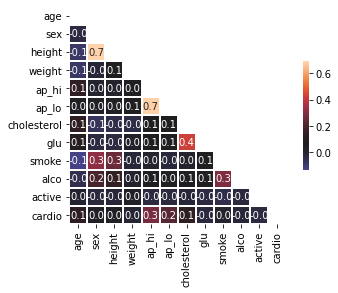

In [26]:
sns.heatmap(corr,linewidths=1,annot= True,square= True,mask=mask,fmt='.1f',center= 0.08,cbar_kws={'shrink': 0.5})